<table align="center"><tr><td align="center" width="9999">

<img src="https://wp.technologyreview.com/wp-content/uploads/2019/07/gettyimages-932729844arxivbrain-10.jpg" align="center" width="200" alt="Project icon">

# Introdução a redes neurais
### Perceptron: O neurônio articial

</td></tr>

</table>    

<div align="right">

Bruno Luvizotto Carli<br/>

brunolcarli@gmail.com
</div>

<hr />

Olá amigo leitor, pretendo através deste pequeno *notebook* introduzir-te de forma prática ao mundo do machine-learning e das tão comentadas **Redes Neurais Artificiais**. Neste episódio veremos algumas funções matemáticas básicas utilziadas para compreensão dos métodos de classificação utilizados nas redes neurais. Aplicaremos estas formulas através da linguagem de programação Python para implementar nosso primeiro neurônio artificial de forma a compreender como esta pequena célula funciona, logicamente, em um escopo meramente ilustrativo. Desejo-lhe uma boa leitura e prática.


Para implementar o neurônio utilizaremos estas bibliotecas Python:



In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from random import randint, random

## Exemplo lúdico

Imagine a seguinte situação, você é um educador da rede de ensino ou de uma instituição e possui alguns dados para classificar através de uma rede neural. O conjunto de dados é simples e se constitui apenas do nome do aluno como rótulo para uma estrutura que é composta pela nota do seu `trabalho`, a nota da sua `prova` e o `resultado` final.

O rsultado existe ja em alguns alunos que você avaliou manualmente, porém outros ainda não foram avaliados, queremos construir a os componentes da rede neural que faça isso para nós.

Aqui temos uma pequena amostra do formato dos dados:




In [105]:
# Estrutura dos dados de amostra
data = {
    'pedrinho': {
        'trabalho': 9.0,
        'prova': 8.0,
        'resultado': True  # aprovado
    },
    'toninho': {
        'trabalho': 3.0,
        'prova': 4.0,
        'resultado': False # Reprovado
    },
    'mariazinha': {
        'trabalho': 7.0,
        'prova': 6.0,
        'resultado': None # ?
    }
}

# Em forma de tabela
df = pd.DataFrame(data).T
df

,trabalho,prova,resultado
pedrinho,9,8,True
toninho,3,4,False
mariazinha,7,6,NaN


## O modelo

Para construir o algoritmo matemático da rede neural é preciso que seja bem definido o problema. Neste caso, queremos um modelo que avalie como aprovados os alunos que possuírem pontuação acima da margem de expectativa.

Observe na imagem abaixo que **o modelo** é representado pela **linha** que separa as massas de dados. Os dados em AZUL são amostras de alunos com pontuação acima da margem de expectativa e são classificados como `APROVADOS`, e os vermelhos por estarem abaixo da margem são classificados como `REPROVADOS`:

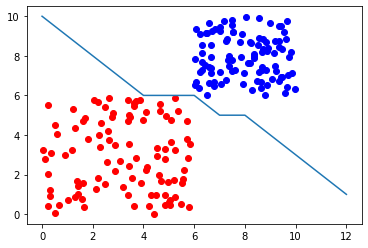

In [106]:

# Exemplo de massa de dados com valores aprovados
ap_x = [randint(6, 9) + random() for _ in range(100)]
ap_y = [randint(6, 9) + random() for _ in range(100)]

# Exemplo de massa de dados de valores reprovados
rp_x = [randint(0, 5) + random() for _ in range(100)]
rp_y = [randint(0, 5) + random() for _ in range(100)]

plt.plot([10,9, 8, 7, 6, 6, 6, 5, 5, 4, 3, 2, 1])
plt.scatter(ap_x, ap_y, c='blue')
plt.scatter(rp_x, rp_y, c='red')
plt.show()

A linha de classificação do modelo é definida por uma **equação linear**: `2xi + 2xj - 18 = 0` onde `xi` é deve ser o valor da nota do trabalho e `xj` o valor da nota da prova.

Sendo assim podemos descrever a equação como **2.trabalho + prova - 18**

## Previsão

A previsão é or esultado da análise classificatória. No exemplo acima, é aprovado o aluno que possuir pontuação positiva (`y > 0`) e reprovado se a pontuação for menor ou igual a zero (`y <= 0`)

onde `y` é o resultado da classificação:

\begin{equation}
y = 2.trabalho + prova - 18
\end{equation}

## Pesos

Os pesos permitem ajustar a fronteira do modelo, portanto multiplica-se cada entrada por um respectivo peso de ajuste, o viés (`b`) é a definido pela constante da equação (`18`) logo, a definiçnao matemática da nossa equação deve ficar:

\begin{equation}
wixi + xjxj + b = 0
\end{equation}



Em uma forma resumida pode-se também descrever a equação como:

\begin{equation}
wx + b = 0
\end{equation}

Onde `w` é o vetor de pesos `(wi, wj)` e x o vetor de entradas `(xi, xj)`


Para uma coordenada (xi, xj) chamaremos o rótulo de `y`, sendo este o valor que queremos prever.

- `y` poderá ser `1` ou `0`:
    + `1` se a classificaçnao for maior que `0`;
    + `0` se a classificação for menor ou igual a `0`;


## Perceptron

Perceptron é o nome dado a um único neurônio em sua forma mais simples. Se pensar no exemplo dos alunos anteriormente citado, a perceptron deve classificar os valores de notas e provas dos alunos e predizer 1 ou 0 baseado nos dados recebidos.

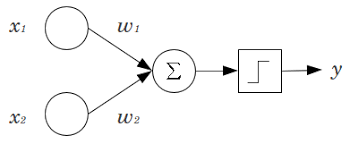

Aqui podemos definir:

- Uma função de entrada:
    + Recebe os *inputs* passa para a equação linear;
- Função da equação linear:
    + processa a equação definida e passa para o classificador;
- Função de classificação:
    + irá prever, baseado no cállculo da equação, se o aluno está ou não aprovado.
- Função de saída:
    - Devolve o resultado processado pelo neurônio;

In [100]:
# Em python podemos definir a perceptrion como:
class Perceptron:
  def __init__(self):
    self.wi = 2
    self.wj = 1

  def receive_input(self, X):
    """
    param X: <list> : Vector containing (xi, xj)
    """
    try:
      xi, xj = X
    except ValueError:
      raise Exception('This neuron accepts a length=2 vector only!')

    return self.process(xi, xj)

  def process(self, xi, xj):
    """
    param xi : <int> : Value for student handwork
    param hj : <int> : Value for student final test
    """
    result = (self.wi * xi) + (self.wj * xj) - 18

    return self.step_function(result)

  def step_function(self, y):
    """
    param y: <float> : equation result
    """
    prediction = 1 if y > 0 else 0

    return self.output(prediction)

  def output(self, value):
    """
    returns the perceptron prediction on the received inputs
    """
    return value


In [102]:
result_labels = {
    1: 'APROVADO',
    0: 'REPROVADO'
}

# Vamos testar sobre os dados apresentados no inicio
pedrinho = [data['pedrinho'].get('trabalho'), data['pedrinho'].get('prova')]
toninho = [data['toninho'].get('trabalho'), data['pedrinho'].get('prova')]
mariazinha = [data['mariazinha'].get('trabalho'), data['pedrinho'].get('prova')]

perceptron = Perceptron()



In [103]:
pedrinho_resultado = perceptron.receive_input(pedrinho)
toninho_resultado = perceptron.receive_input(toninho)
mariazinha_resultado = perceptron.receive_input(mariazinha)

print(f'Pedrinho: {result_labels[pedrinho_resultado]}')
print(f'Toninho: {result_labels[toninho_resultado]}')
print(f'Mariazinha: {result_labels[mariazinha_resultado]}')

Pedrinho: APROVADO
Toninho: REPROVADO
Mariazinha: APROVADO
